In [12]:
options(warn=-1)

In [13]:
install.packages("GGally")
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [14]:
library(GGally)
library(ggplot2)

# Analisis exploratorio de "movies"

La base con la que trabajaremos tiene por nombre "movies", en estos datos encontramos información de películas desde el año 1986 hasta 2016, la base cuenta con 6820 observaciones y con 15 variables que se describen a continuación:

* **budget**: Presupuesto de la película.

$\quad$Mínimo:0, máximo:300,000,000, media: 24,581,129. Es claro que los ceros de esta variable son datos faltantes.
* **company**: Compañia que hizo la película.

$\quad$Variable categórica con 2179 compañías, entre las compañías con más películas se encuentran Universal Pictures con 302, Warner Bros con 294 y Paramount Pictures con 259.

* **country**: País de origen de la película.

$\quad$Variable categórica con 57 distintos países, los países con más película son Estados Unidos con 4872, Reino Unido con 698 y Francia con 283.

* **director**: Director de la película.

$\quad$Variable categórica con 2759 distintis directores, los directores con mas películas son Woody Allen con 33, Clint Eastwood con 24 y Steven Soderbergh con 21.

* **genre**: Género de la película.

$\quad$Variable categórica con 17 distintos géneros, los géneros con más películas son comedia con 2080, drama con 1444 y acción con 1331.

* **gross**: Ganancia bruta de la película.

$\quad$Mínimo:70, máximo:936,662,225, media: 33,497,829.

* **name**: Nombre de la película.

* **rating**: Clasificación de la película.

$\quad$Variable categórica con 13 categorías distintas, las clasificacines con más películas son R con 3392, PG-13 con 1995 y PG con 951.

* **released**: Fecha de lanzamiento de la película.

* **runtime**: Duración de la película en minutos.

$\quad$Mínimo:50, máximo:366, media: 106.6.

* **score**: Puntuación de la película.

$\quad$Mínimo:1.5, máximo:9.3, media: 6.375.
* **star**: Actor/actriz principal de la película.

* **votes**: Votos para la puntuación de la película.

$\quad$Mínimo:27, máximo:1861666, media: 71220.
* **writer**: Escritor del guión de la película.

* **year**: Año de estreno de la película.

$\quad$Se usará como variable categórica con 31 años distintos, los años con más películas son 1989 con 221, 1986 con 220 y 1988 con 220.

In [ ]:
movies<-read.csv("movies.csv")
movies$year<-as.factor(movies$year)

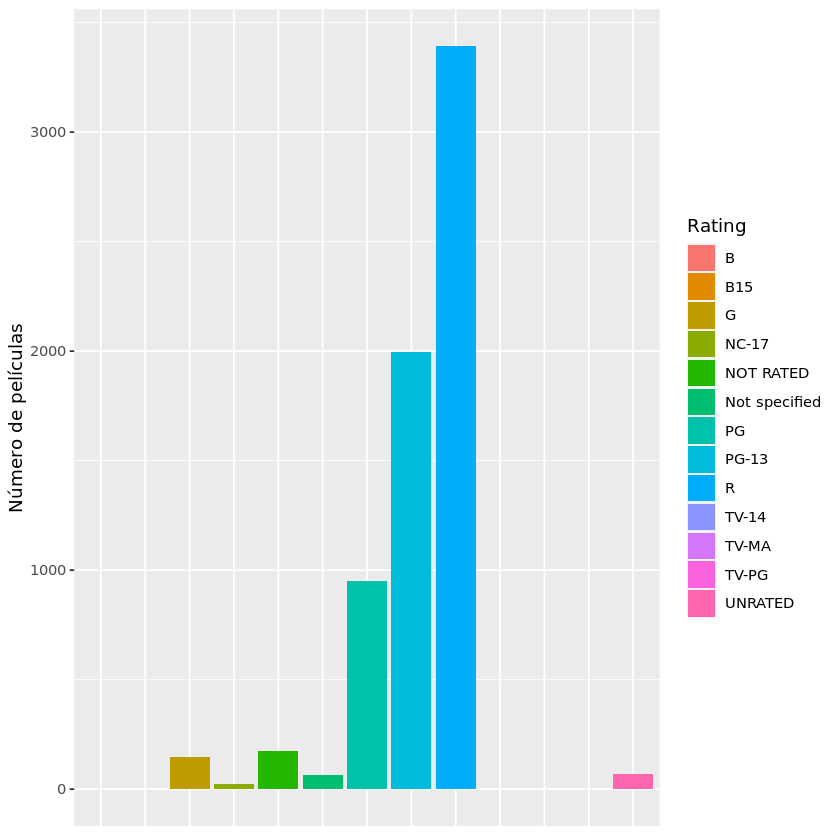

In [20]:
ggplot(movies, aes(x=movies$rating, fill=movies$rating )) + 
  geom_bar( ) + scale_y_continuous(name= "Número de películas")+
  theme(axis.title.x = element_blank(),axis.text.x = element_blank(),axis.ticks.x = element_blank())+labs(fill="Rating")


Con la gráfica anterior comprobamos que la clasificación R tiena más películas, seguida de PG-13 y despúes PG. También observamos que las clasificaciones con menos películas son B, B15, TV-14, TV-MA y TV-PG.

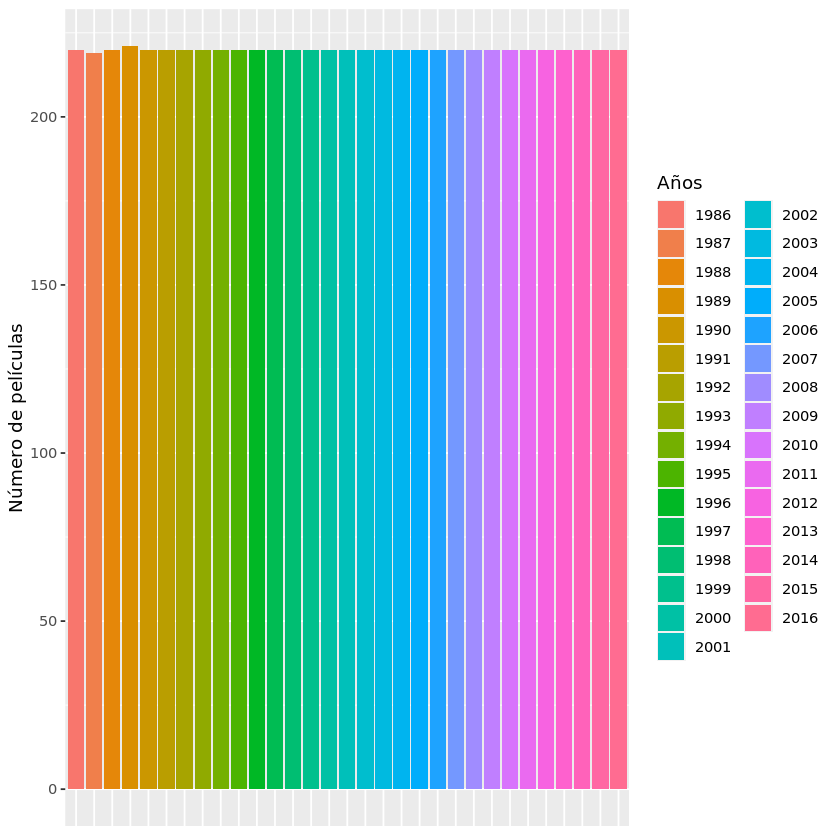

In [21]:
ggplot(movies, aes(x=movies$year, fill=movies$year )) + 
  geom_bar( ) + scale_y_continuous(name= "Número de películas")+
  theme(axis.title.x = element_blank(),axis.text.x = element_blank(),axis.ticks.x = element_blank())+labs(fill="Años")


La gráfica de los años nos deja ver que hay una cantidad uniforme en casi todos los años, 220 películas por año, a excepción de 1987 con 219 películas y 1989 con 221 películas.

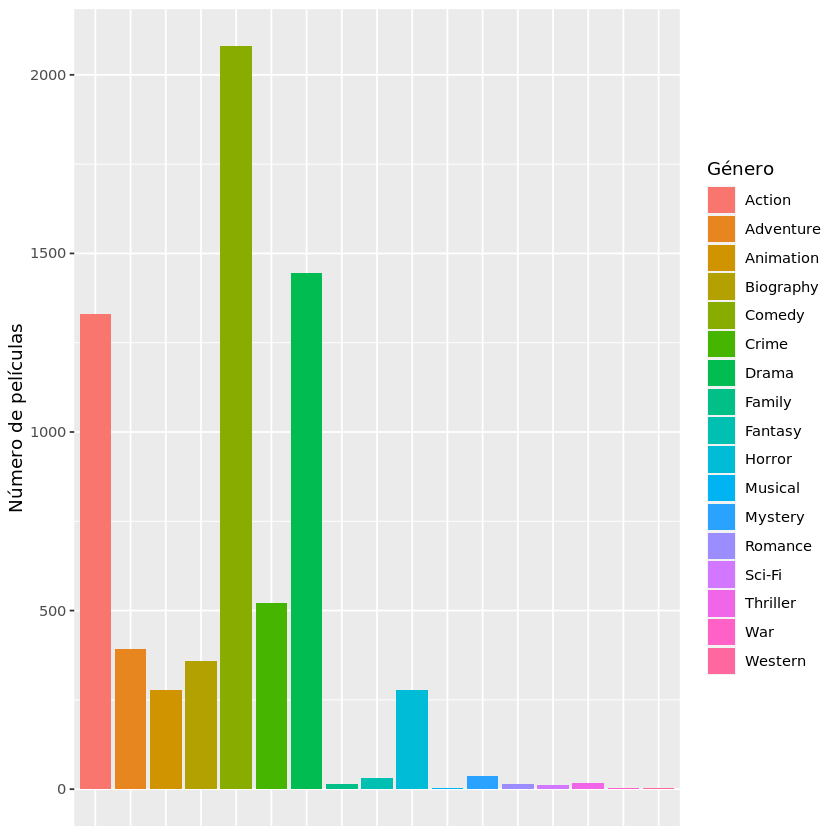

In [19]:
ggplot(movies, aes(x=movies$genre, fill=movies$genre )) + 
  geom_bar( ) + scale_y_continuous(name= "Número de películas")+
  theme(axis.title.x = element_blank(),axis.text.x = element_blank(),axis.ticks.x = element_blank())+labs(fill="Género")

Con esta gráfica podemos confirmar que los géneros con más películas son comedia, drama y acción, ademas podemos ver que hay géneros que tienen muy pocas películas como guerra, musicales y wéstern.

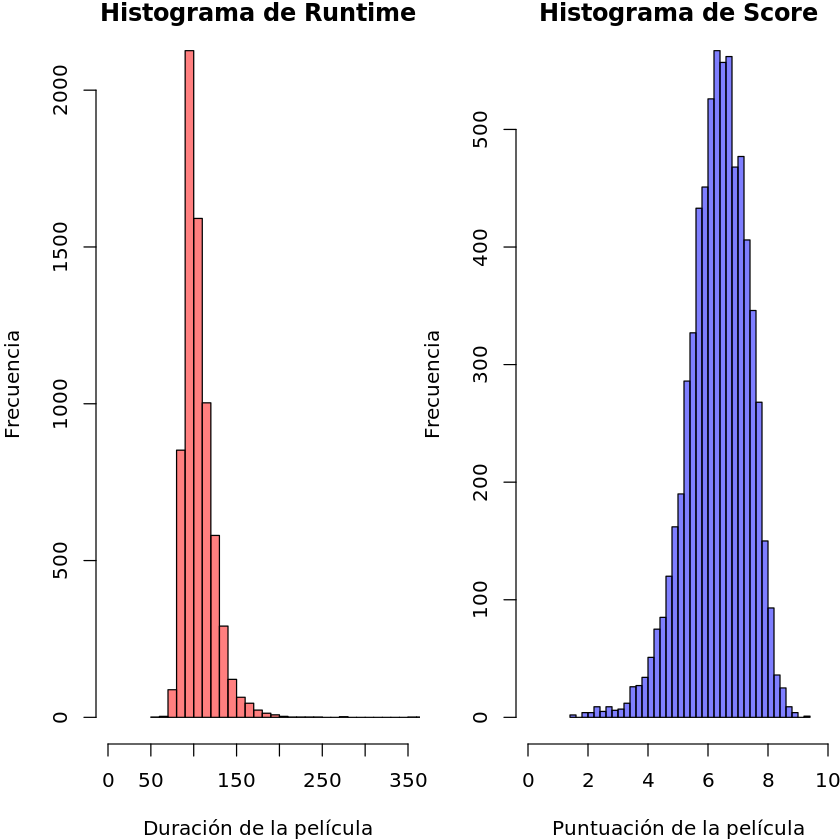

In [22]:
par(
  mfrow=c(1,2),
  mar=c(4,4,1,0)
)

hist(movies$runtime, breaks=30 , xlim=c(0,350) , col=rgb(1,0,0,0.5) , xlab="Duración de la película" , ylab="Frecuencia" , main="Histograma de Runtime" )
hist(movies$score, breaks=30 , xlim=c(0,10) , col=rgb(0,0,1,0.5) , xlab="Puntuación de la película" , ylab="Frecuencia" , main="Histograma de Score")


En el  histograma rojo podemos observar que la distribucion de la variable runtime esta sesgada a la derecha y los valores están centrados en el 100 aproximadamente, es decir hay más películas que aproximadamente duran 100 minutos.
En el histograma azul observamos que la distribución está un poco sesgada a la izquierda y la mayoría de los valores están alrededor de 6.5, esto nos dice que hay muchas películas con calificación de aproximadamente 6.5.

Ahora observaremos la correlación de las variables numéricas:

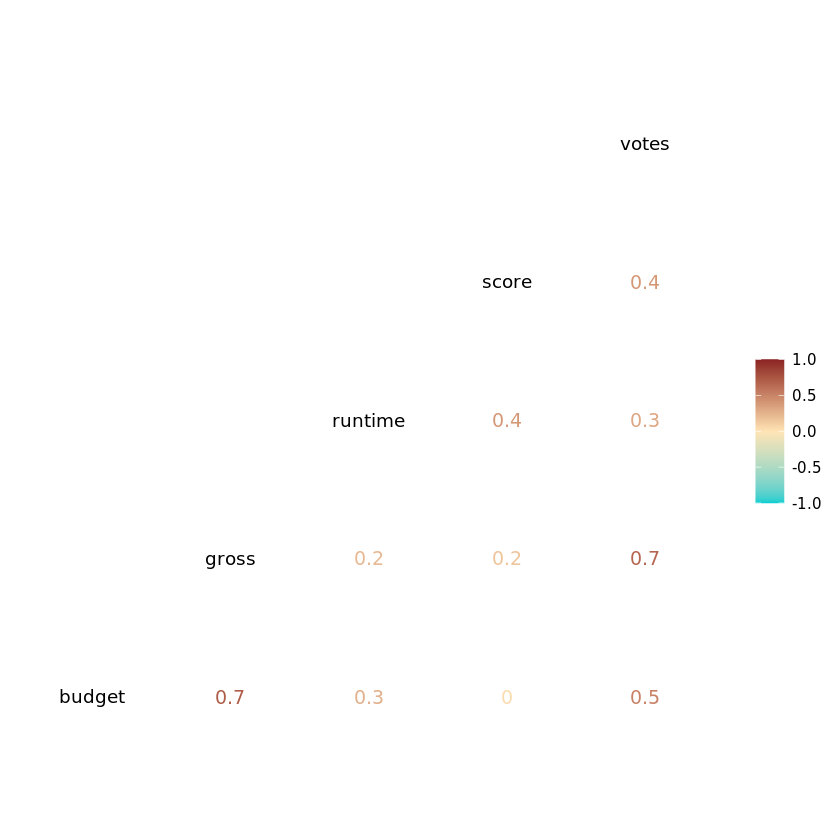

In [15]:
ggcorr(movies,geom = "text",low = "darkturquoise",high = "brown4",mid = "moccasin")


Notemos que las variables con mayor correlación son budget y gross con una correlacion de **.7121**, y las variables gross y votes con una correlación de .6624, es "natural" la correlación alta entre budget y gross pues sería lógico pensar que entre más presupuesto mejores ganancias.

Realizaremos los scatterplot de budget con gross y gross con votes puesto que fueron las variables con correlación más alta:

`geom_smooth()` using formula 'y ~ x'



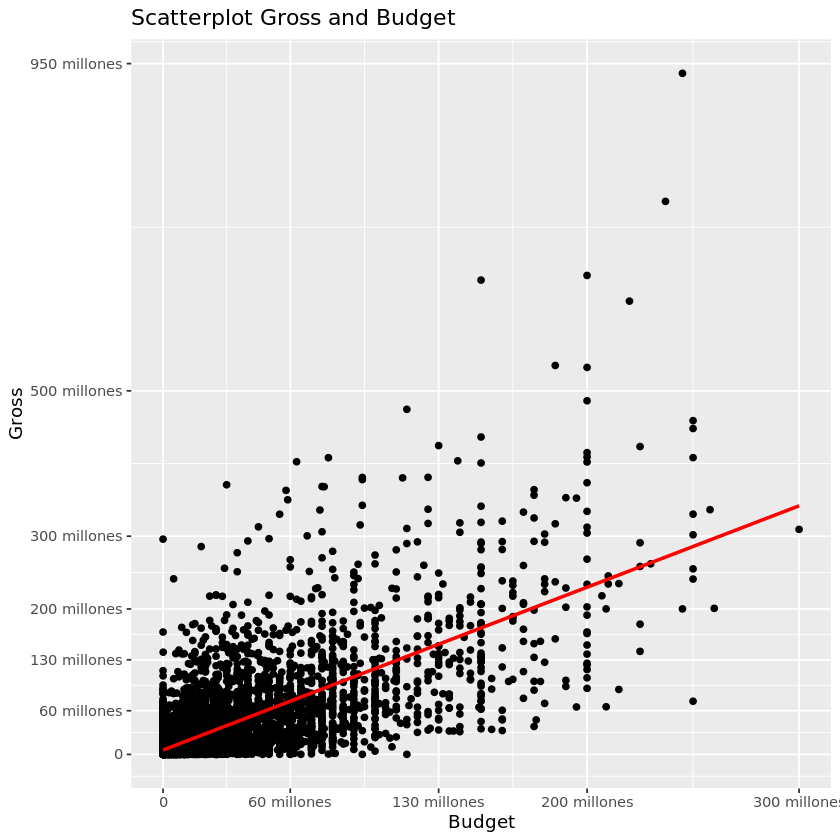

In [16]:
ys<-c("0","60 millones","130 millones","200 millones","300 millones","500 millones","950 millones")
breaksy<-c(0,60000000,130000000,200000000,300000000,500000000,950000000)
ggplot(movies, aes(x=movies$budget, y=movies$gross)) +
  geom_point() +
  geom_smooth(method=lm , color="red", se=FALSE) +
  scale_x_continuous(name= "Budget",labels = ys,breaks = breaksy) +
  scale_y_continuous(name= "Gross",labels = ys,breaks = breaksy) +
  ggtitle("Scatterplot Gross and Budget") 

No es fácil apreciar que exista una relación lineal entre gross y budget.

`geom_smooth()` using formula 'y ~ x'



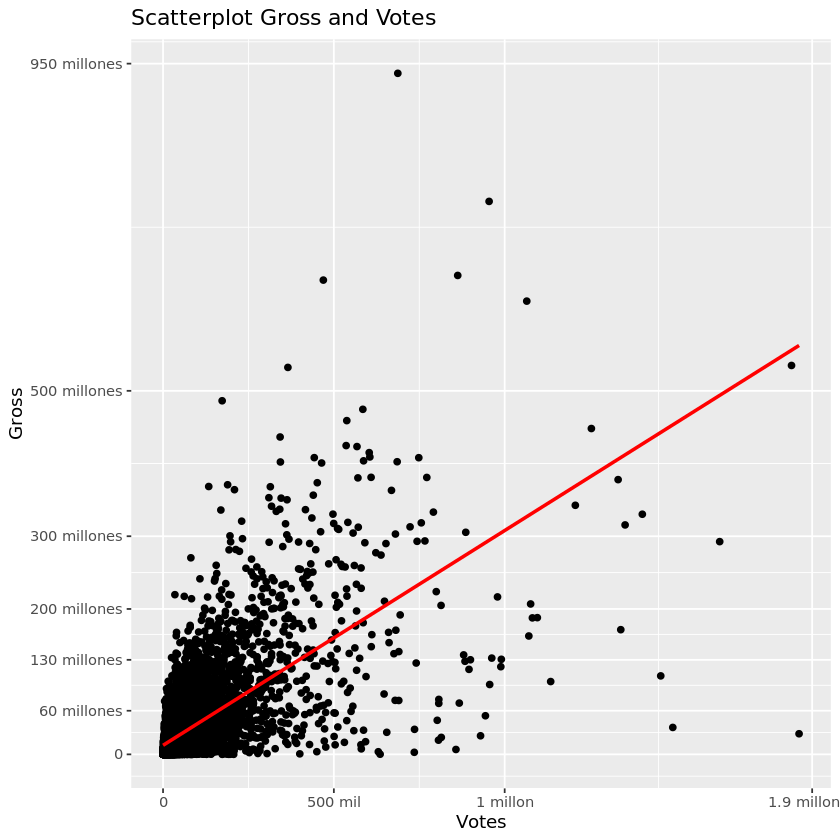

In [17]:
xs<-c("0","500 mil","1 millon","1.9 millones")
breaksx<-c(0,500000,1000000,1900000)
ggplot(movies, aes(x=movies$votes, y=movies$gross)) +
  geom_point() +
  geom_smooth(method=lm , color="red", se=FALSE) +
  scale_x_continuous(name= "Votes",labels = xs,breaks = breaksx) +
  scale_y_continuous(name= "Gross",labels = ys,breaks = breaksy) +
  ggtitle("Scatterplot Gross and Votes") 

In [ ]:
De igual manera, una relación lineal entre estas dos variables no es tan evidente.

# Regresión lineal

Intentaremos ajustar una regresión lineal con gross como la variable explicada y las variables budget, country, genre, rating, runtime, score, votes y year.

In [25]:
movies1<-movies[,c(1,3,5,6,8,10,11,13,15)]
movies1$country = relevel(movies1$country, ref = "USA")
movies1$genre = relevel(movies1$genre, ref = "Comedy")
movies1$rating = relevel(movies1$rating, ref = "R")
modelo1 = lm(movies1$gross ~ . , data = movies1) 
summary(modelo1)


Call:
lm(formula = movies1$gross ~ ., data = movies1)

Residuals:
       Min         1Q     Median         3Q        Max 
-341657346  -12695966   -1493142    8667948  609791522 

Coefficients:
                                        Estimate Std. Error t value Pr(>|t|)
(Intercept)                           -1.537e+06  4.510e+06  -0.341 0.733243
budget                                 7.431e-01  1.628e-02  45.637  < 2e-16
countryArgentina                      -2.662e+06  9.557e+06  -0.279 0.780575
countryAruba                          -9.929e+06  3.425e+07  -0.290 0.771913
countryAustralia                      -4.831e+06  3.841e+06  -1.258 0.208464
countryAustria                        -9.709e+05  1.401e+07  -0.069 0.944753
countryBahamas                         8.484e+06  3.427e+07   0.248 0.804506
countryBelgium                        -8.452e+06  8.179e+06  -1.033 0.301485
countryBrazil                         -2.103e+07  1.403e+07  -1.500 0.133774
countryCanada                       

Notamos que la diferencia entre USA y algunos países no es significativa, procederemos colapsando la variable country.